In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib
import csv
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pandas as pd
from FIF import *

In [2]:
def simul_Brownien_Drift(n = 100,m = 1000,sigma = 1,mu = 0,T = 1):
    tps = np.linspace(0,T,m) # Discrétisation du temps
    B = np.zeros((n,m))
    #B[:,0] = np.random.normal(0,scale = 1,size = n) # départ du MB à 0
    #for j in range(n):
    B[:,0] = 0.75
    for i in range(1,np.size(tps)):
        B[:,i] = B[:, i-1] + sigma*np.random.normal(0,np.sqrt(tps[2]-tps[1]),n)+ mu*(tps[2]-tps[1]) 
    return B;

def dyadic(J_max=7, m=100):
    a =0
    t = np.linspace(0,1,m)
    D = np.zeros((np.sum(np.power(2,np.arange(J_max))),m))
    for J in range(J_max):
        b = np.power(2,J)
        for k in range(b):
            for l in range(m):
                x = b * t[l] - k
                D[a,l] = 1 * (0 <= x < 1)
            a += 1
    return D

In [3]:
os.chdir('../Datasets')

In [4]:
X_trainz = pd.read_csv('CinECGTorso_Train.csv', header = None)
X_train = np.array(X_trainz, dtype= float )[:,1:]
y_train = np.array(X_trainz, dtype= int )[:,0]
time = np.linspace(0,1,X_train.shape[1])

In [156]:
np.random.seed(42)
#D1 = simul_Brownien_Drift(n = 200,m = len(time),sigma = 1,mu = 0,T = 1)
D1 = dyadic(6, m=X_train.shape[1])
F1 = FIForest(X_train, ntrees=100, time = time, subsample_size= X_train.shape[0], 
            D= D1, innerproduct= "auto", alpha = 1, criterion="sample")
b = F1.importance_feature()
D22 = D1[np.flip(np.argsort(b))[:20]]

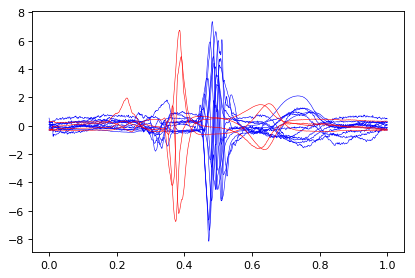

In [157]:
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(y_train)):
    if (y_train[i] == 1):
        plt.plot(time, X_train[i,:],c="b",linewidth = 0.5)
    elif(y_train[i] == -1):
        plt.plot(time, X_train[i,:],c="r",linewidth = 0.5)
plt.savefig('cinecgtorso.pdf')

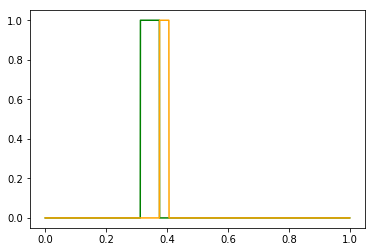

In [164]:
plt.figure(figsize=(6,4))
plt.plot(time, D22[0], c='g')
plt.plot(time, D22[1], c='orange')
#plt.plot(time, D22[2], c='g')
#plt.plot(time, D22[3], c='m')
plt.savefig('indicator.pdf')
plt.show()

In [131]:
np.where(D22[0] == 1)[0]

(array([512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524,
        525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537,
        538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550,
        551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563,
        564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576,
        577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589,
        590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602,
        603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614]),)

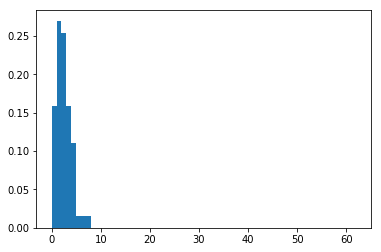

In [144]:
plt.hist( np.flip(np.sort(b)), bins=np.arange(len(b)), density=True )
plt.show()

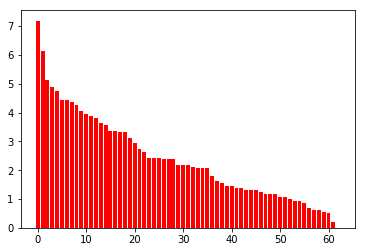

In [162]:
plt.figure(figsize=(6,4
                   ))
plt.bar( np.arange(len(b)), height= np.flip(np.sort(b)), color='r' )
plt.savefig('feature_importance.pdf')
plt.show()

In [141]:
np.flip(np.sort(b))

array([7.1875, 6.125 , 5.125 , 4.875 , 4.75  , 4.4375, 4.4375, 4.375 ,
       4.25  , 4.0625, 3.9375, 3.875 , 3.8125, 3.625 , 3.5625, 3.375 ,
       3.375 , 3.3125, 3.3125, 3.125 , 2.9375, 2.75  , 2.625 , 2.4375,
       2.4375, 2.4375, 2.375 , 2.375 , 2.375 , 2.1875, 2.1875, 2.1875,
       2.125 , 2.0625, 2.0625, 2.0625, 1.8125, 1.625 , 1.5625, 1.4375,
       1.4375, 1.375 , 1.375 , 1.3125, 1.3125, 1.3125, 1.25  , 1.1875,
       1.1875, 1.1875, 1.0625, 1.0625, 1.    , 0.9375, 0.9375, 0.875 ,
       0.6875, 0.625 , 0.625 , 0.5625, 0.5   , 0.1875, 0.    ])